In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

## Extensión de los casquetes de hielo

Cargamos el conjunto ``seaice.csv``, sobre la extensión del hielo polar.

In [5]:
ice = pd.read_csv('seaice.csv')
ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         23860 non-null  int64  
 1   Month        23860 non-null  int64  
 2   Day          23860 non-null  int64  
 3   Extent       23860 non-null  float64
 4   Missing      23860 non-null  float64
 5   Source Data  23860 non-null  object 
 6   hemisphere   23860 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 1.3+ MB


In [9]:
ice.tail()

Year  Month  Day  Extent  Missing  \
23855  2015     12   27   8.358      0.0   
23856  2015     12   28   8.098      0.0   
23857  2015     12   29   7.791      0.0   
23858  2015     12   30   7.494      0.0   
23859  2015     12   31   7.222      0.0   

                                             Source Data hemisphere  
23855  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      south  
23856  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      south  
23857  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      south  
23858  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      south  
23859  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      south

Dibujamos la extensión de hielo polar (`Extent`) y observamos que el conjunto de datos parece tener dos partes diferenciadas:

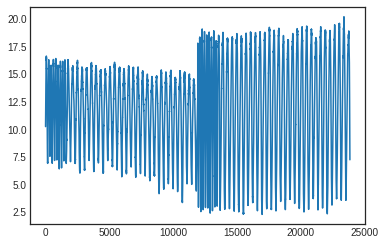

In [6]:
plt.plot(ice['Extent'])

In [10]:
ice.describe(include='all')

Year         Month           Day        Extent  Missing  \
count   23860.000000  23860.000000  23860.000000  23860.000000  23860.0   
unique           NaN           NaN           NaN           NaN      NaN   
top              NaN           NaN           NaN           NaN      NaN   
freq             NaN           NaN           NaN           NaN      NaN   
mean     1998.851635      6.550293     15.742917     11.603068      0.0   
std         9.951976      3.447684      8.802258      4.586068      0.0   
min      1978.000000      1.000000      1.000000      2.264000      0.0   
25%      1991.000000      4.000000      8.000000      7.747750      0.0   
50%      1999.000000      7.000000     16.000000     12.297000      0.0   
75%      2007.000000     10.000000     23.000000     15.197250      0.0   
max      2015.000000     12.000000     31.000000     20.201000      0.0   

                                              Source Data hemisphere  
count                                               23860      23860  
unique                                              23860          2  
top     ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north  
freq                                                    1      11930  
mean                                                  NaN        NaN  
std                                                   NaN        NaN  
min                                                   NaN        NaN  
25%                                                   NaN        NaN  
50%                                                   NaN        NaN  
75%                                                   NaN        NaN  
max                                                   NaN        NaN

Observando las variables regresoras vemos que `hemisphere` sólo toma dos valores, y nos limitamos a estudiar el casquete del polo norte.

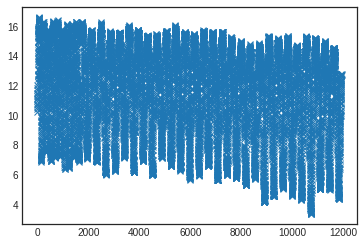

In [11]:
icen = ice[ice['hemisphere']=='north']
plt.plot(icen['Extent'],'x')

Observamos las primeras y las últimas entradas de `icen`:

In [12]:
icen.head()

Year  Month  Day  Extent  Missing  \
0  1978     10   26  10.231      0.0   
1  1978     10   28  10.420      0.0   
2  1978     10   30  10.557      0.0   
3  1978     11    1  10.670      0.0   
4  1978     11    3  10.777      0.0   

                                         Source Data hemisphere  
0  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north  
1  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north  
2  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north  
3  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north  
4  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north

In [43]:
icen.tail()

Year  Month  Day  Extent  Missing  \
11925  2015     12   27  12.680      0.0   
11926  2015     12   28  12.745      0.0   
11927  2015     12   29  12.762      0.0   
11928  2015     12   30  12.800      0.0   
11929  2015     12   31  12.735      0.0   

                                             Source Data hemisphere  
11925  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north  
11926  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north  
11927  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north  
11928  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north  
11929  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north

vemos que las entradas están ordenadas cronológicamente, una medición cada dos días al principio y una cada día al final.

Vemos también que parece que no hay relación entre el índice que numera las entradas y la extensión de hielo. Comprobamos además que la correlación es negativa pero pequeña.

In [13]:
icen.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            11920, 11921, 11922, 11923, 11924, 11925, 11926, 11927, 11928,
            11929],
           dtype='int64', length=11930)

In [45]:
np.corrcoef(icen.index, icen['Extent'])

array([[ 1.        , -0.18284743],
       [-0.18284743,  1.        ]])

Sin embargo, haciendo un poco de zoom vemos un patrón estacional muy fuerte, que no deja ver la tendencia a largo plazo

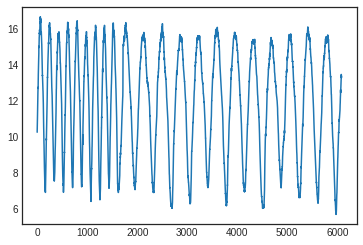

In [53]:
icen = ice[(ice['hemisphere']=='north') & (ice['Year'] < 2000)]
plt.plot(icen['Extent'])

Si seleccionamos un único mes del año, entonces se aprecia la tendencia descendiente del hielo.

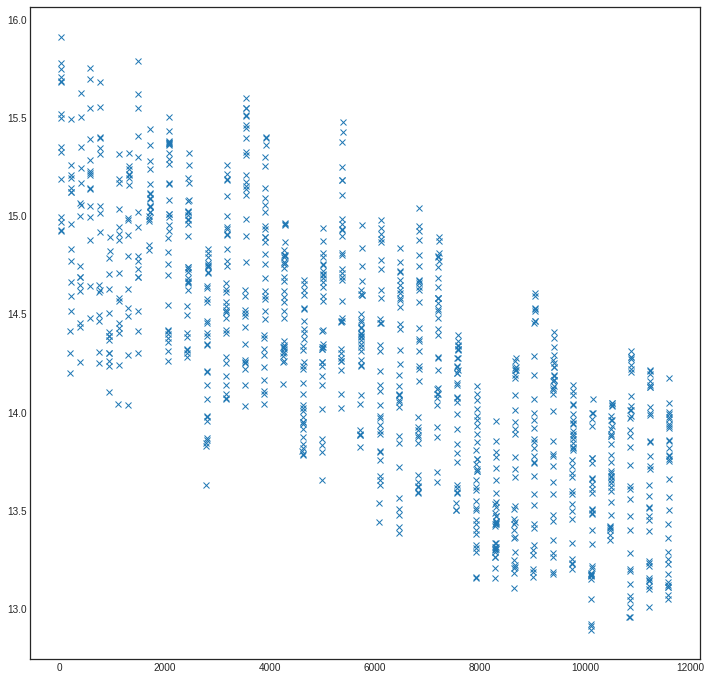

In [59]:
icenD = ice[(ice['hemisphere']=='north') & (ice['Month']==1)]
plt.figure(figsize=(12,12))
plt.plot(icenD['Extent'], 'x')

Otra forma distinta de capturar la tendencia es usar regresión. Pero un modelo `Extent ~ Year` da un resultado muy malo.

In [58]:
est = smf.ols('Extent ~ Year', icen).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Extent   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     329.7
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           1.06e-72
Time:                        11:45:34   Log-Likelihood:                -30792.
No. Observations:               11930   AIC:                         6.159e+04
Df Residuals:                   11928   BIC:                         6.160e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    118.1817      5.879     20.102      0.000     106.658     129.706
Year          -0.0534      0.003    -18.158      0.000      -0.059      -0.048
==============================================================================
Omnibus:                     8026.070   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              979.123
Skew:                          -0.391   Prob(JB):                    2.43e-213
Kurtosis:                       1.835   Cond. No.                     4.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Como el patrón estacional es más fuerte, podemos intentar explicar la extensión del hielo en función del mes. Sin embargo, si ajustamos un modelo

>    `Extent ~ Month`

el resultado es también bastante malo...

In [14]:
est = smf.ols('Extent ~ Month', icen).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Extent   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     8204.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:12:53   Log-Likelihood:                -27833.
No. Observations:               11930   AIC:                         5.567e+04
Df Residuals:                   11928   BIC:                         5.568e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.3628      0.049    313.288      0.000      15.267      15.459
Month         -0.6000      0.007    -90.573      0.000      -0.613      -0.587
==============================================================================
Omnibus:                       98.579   Durbin-Watson:                   0.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.211
Skew:                          -0.165   Prob(JB):                     7.00e-20
Kurtosis:                       2.738   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El motivo por el que es tan malo es obvio al hacer un scatter plot de Extent contra Month

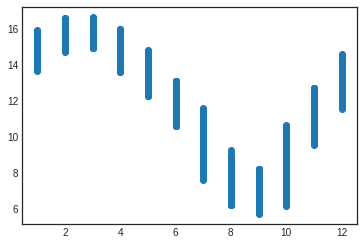

In [56]:
plt.scatter(icen['Month'], icen['Extent'])

Lo que ocurre es que la dependencia del mes en la extensión del casquete claramente no es lineal. Si ajustamos un modelo

>    `Extent ~ Month`

que corresponde a:

$$
\text{Extent} = \beta_0 + \beta_M \cdot \text{Month}
$$

y concretando:

 - cuando el mes es Diciembre (12), nuestra predicción es $\beta_0 + 12\beta_M$.
 - cuando el mes es Febrero (2), nuestra predicción es $\beta_0 + 2\beta_M$.

En otras palabras, estamos imponiendo que el efecto del mes de Diciembre es 6 veces el efecto del mes de Febrero, etc.


Sin embargo, si usamos

>    Extensión del hielo ~ C(Mes)

la librería `statsmodels` pasa a considerar que cada valor de mes es una variable categórica, de modo que `Month=1` es cualititavemente distinto a `Month=2`, en vez de ser el doble.

Estamos ajustando un modelo

$$
    E = \beta_0 + \beta_{FEBRERO} x_{FEBRERO} + \dots + \beta_{DICIEMBRE} x_{DICIEMBRE}  + \varepsilon
$$

donde la contribución del mes de Diciembre es independiente de la contribución del efecto del mes de Enero.

Ejercicio: lee el final del cuaderno de regresión múltiple y/o el capítulo 3 del libro [ISL](https://www.statlearning.com/), y explica por qué el modelo `'Extent ~ C(Month)'` es:

$$
E = \beta_0 + \beta_{FEBRERO} x_{FEBRERO} + \dots + \beta_{DICIEMBRE} x_{DICIEMBRE}  + \varepsilon
$$

en vez de

$$
E = \beta_0 + \beta_{ENERO} x_{ENERO} + \beta_{FEBRERO} x_{FEBRERO} + \dots + \beta_{DICIEMBRE} x_{DICIEMBRE}  + \varepsilon
$$



In [57]:
icen = ice[ice.hemisphere=='north']
est = smf.ols('Extent ~ C(Month)', icen).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Extent   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 1.464e+04
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:44:50   Log-Likelihood:                -14997.
No. Observations:               11930   AIC:                         3.002e+04
Df Residuals:                   11918   BIC:                         3.011e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         14.2833      0.027    529.450      0.000      14.230      14.336
C(Month)[T.2]      0.8692      0.039     22.319      0.000       0.793       0.946
C(Month)[T.3]      1.0235      0.038     26.914      0.000       0.949       1.098
C(Month)[T.4]      0.3002      0.038      7.828      0.000       0.225       0.375
C(Month)[T.5]     -1.1077      0.038    -29.120      0.000      -1.182      -1.033
C(Month)[T.6]     -2.6843      0.038    -70.000      0.000      -2.759      -2.609
C(Month)[T.7]     -5.0957      0.038   -133.995      0.000      -5.170      -5.021
C(Month)[T.8]     -7.3799      0.038   -194.299      0.000      -7.454      -7.305
C(Month)[T.9]     -8.1761      0.038   -214.032      0.000      -8.251      -8.101
C(Month)[T.10]    -6.2066      0.038   -163.924      0.000      -6.281      -6.132
C(Month)[T.11]    -3.7340      0.038    -98.117      0.000      -3.809      -3.659
C(Month)[T.12]    -1.5570      0.038    -40.963      0.000      -1.632      -1.483
==============================================================================
Omnibus:                      439.024   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.805
Skew:                          -0.407   Prob(JB):                    6.15e-123
Kurtosis:                       3.686   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Ejercicio 1 (lo hacemos en clase)

 - Elige un mes del año, selecciona sólo los datos de ese mes, para cada año estudiado, y ajusta un modelo de regresión a la extensión del hielo para los datos de ese mes.
 - Intenta explicar los datos de extensión del hielo polar en función del año y del mes con un modelo de regresión (pero *atención*: ¿cómo tiene sentido incorporar el mes?). ¿El modelo es mejor que el que usa sólo los datos de año, o solo los datos de mes?
 - Usa el modelo para extrapolar la extensión del hielo en el Oceáno Ártico en Julio de 2030, 2040 y 2050.

## Ejercicio 2

El objetivo de este ejercicio es elegir un modelo para predecir el consumo de un vehículo en base a varias variables regresoras:

 - `mpg`: miles per gallon (consumo)
 - `cyl`: número de cilindros
 - `disp`: desplazamiento
 - `hp` : horsepower (potencia)
 - `wt`: weight (peso)
 - `am`: cambio automático (am==1), o manual (am==0)
 - `gear`: número de marchas

Se pide:

 - Identifica qué variables regresoras son categóricas: ¿las ha reconocido correctamente pandas?
 - Comienza por el modelo que explica `mpg` usando todas las variables regresoras posibles. Encuentra la mejor variable que eliminar para obtener un modelo con una variable menos. Compara el modelo de 6 variables regresoras con el que usa sólo 5.
 - Repite el proceso anterior hasta encontrar un modelo que no se pueda simplificar sin estropear los indicadores.

In [21]:
mtcars = pd.read_csv('mtcars.csv', usecols=[
    'mpg', 'cyl', 'disp', 'hp', 'wt', 'am', 'gear'
])
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   wt      32 non-null     float64
 5   am      32 non-null     int64  
 6   gear    32 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 1.9 KB


In [22]:
mtcars.head()

mpg  cyl   disp   hp     wt  am  gear
0  21.0    6  160.0  110  2.620   1     4
1  21.0    6  160.0  110  2.875   1     4
2  22.8    4  108.0   93  2.320   1     4
3  21.4    6  258.0  110  3.215   0     3
4  18.7    8  360.0  175  3.440   0     3

In [23]:
mtcars.describe()

mpg        cyl        disp          hp         wt         am  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.217250   0.406250   
std     6.026948   1.785922  123.938694   68.562868   0.978457   0.498991   
min    10.400000   4.000000   71.100000   52.000000   1.513000   0.000000   
25%    15.425000   4.000000  120.825000   96.500000   2.581250   0.000000   
50%    19.200000   6.000000  196.300000  123.000000   3.325000   0.000000   
75%    22.800000   8.000000  326.000000  180.000000   3.610000   1.000000   
max    33.900000   8.000000  472.000000  335.000000   5.424000   1.000000   

            gear  
count  32.000000  
mean    3.687500  
std     0.737804  
min     3.000000  
25%     3.000000  
50%     4.000000  
75%     4.000000  
max     5.000000

In [24]:
est = smf.ols('mpg ~ cyl+disp+hp+wt+am+gear', mtcars).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     24.61
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           2.37e-09
Time:                        10:32:00   Log-Likelihood:                -71.460
No. Observations:                  32   AIC:                             156.9
Df Residuals:                      25   BIC:                             167.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.7421      6.023      6.266      0.000      25.337      50.147
cyl           -1.0864      0.719     -1.510      0.144      -2.568       0.395
disp           0.0126      0.012      1.011      0.322      -0.013       0.038
hp            -0.0288      0.017     -1.722      0.097      -0.063       0.006
wt            -3.3103      1.159     -2.857      0.008      -5.696      -0.924
am             1.4650      1.743      0.841      0.408      -2.124       5.054
gear           0.1205      1.234      0.098      0.923      -2.422       2.663
==============================================================================
Omnibus:                        4.021   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.115
Skew:                           0.763   Prob(JB):                        0.211
Kurtosis:                       3.073   Cond. No.                     4.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
plt.scatter(mtcars['wt'], mtcars['mpg'])

### Ejercicio 3

 - Carga el conjunto ``seaice.csv``, sobre la extensión del hielo polar.
 - Selecciona sólo los datos de extensión del hielo en el hemisferio norte.
 
Nos enseñan que es posible introducir una variable al cuadrado como variable regresora, e intentamos un modelo polinómico, de orden 2:

$$
    E = \beta_0 + \beta_{Y}\cdot x_{Year} + \beta_{Y,2}\cdot x_{Year}^2 + \varepsilon
$$


In [63]:
est = smf.ols('Extent ~ Year + np.power(Year,2)', icen).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Extent   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     168.1
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           1.01e-72
Time:                        11:54:16   Log-Likelihood:                -30789.
No. Observations:               11930   AIC:                         6.158e+04
Df Residuals:                   11927   BIC:                         6.161e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2894.4776   1194.924     -2.422      0.015   -5236.723    -552.232
Year                  2.9623      1.196      2.477      0.013       0.618       5.307
np.power(Year, 2)    -0.0008      0.000     -2.521      0.012      -0.001      -0.000
==============================================================================
Omnibus:                     8311.875   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              980.350
Skew:                          -0.389   Prob(JB):                    1.32e-213
Kurtosis:                       1.830   Cond. No.                     1.63e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Se pide:

 - ¿El modelo es mejor que los modelos del ejercicio anterior?
 - Construye un modelo con el mes, el año y el año al cuadrado como variables explicativas, para tener un modelo cuadrático del año, y manteniendo el mes como variable categórica. 
 - ¿Qué signo tiene la derivada segunda del hielo respecto del año en ese modelo? ¿Puedes interpretar el signo de este coeficiente como una indicación de que la pérdida de hielo en el ártico se está acelerando o se está frenando?
 - Usa el modelo cuadrático para extrapolar la extensión del hielo en el Oceáno Ártico en Agosto de 2030, 2040 y 2050. Compara el resultado con los obtenidos para el modelo lineal.